# Árvores de Decisão

## O que é uma arvore de decisão ?

Uma árvore de decisão é um modelo de machine learning usado para tomar decisões com base em dados. Ela organiza as informações em forma de um gráfico parecido com uma árvore, onde cada "nó" representa uma pergunta ou condição sobre os dados, e cada "ramo" leva a uma possível resposta ou decisão. As folhas finais indicam o resultado ou categoria. É amplamente usada em problemas de classificação e regressão por sua simplicidade e facilidade de interpretação.

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#comprimentos e larguras das petalas
x = iris.data[:, 2:]

#classes
y = iris['target']

In [9]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x, y)

DecisionTreeClassifier()

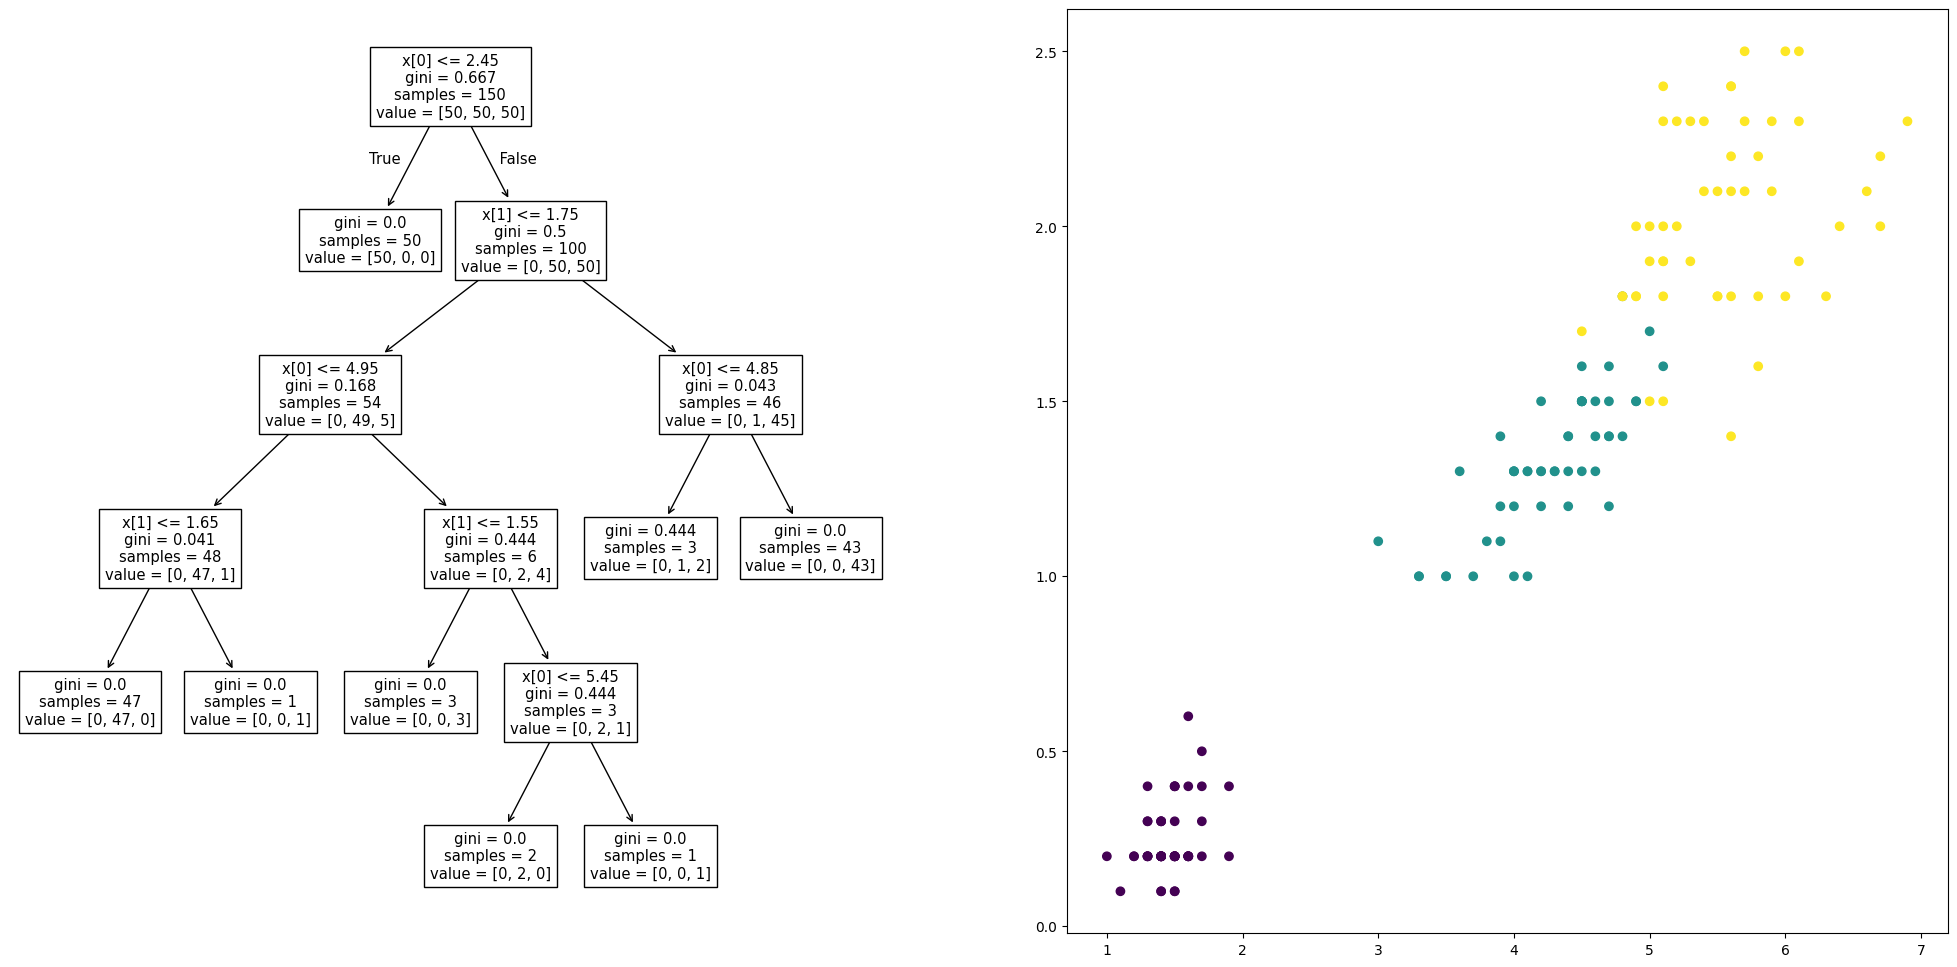

In [18]:
#vizualisando a arvore de decisão
fig, ax = plt.subplots(1, 2, figsize=(25, 12))
tree.plot_tree(tree_clf, ax=ax[0])
ax[1].scatter(x[:,0], x[:,1], c=y)

## Gini Impurity

A **Gini Impurity** é uma métrica usada em árvores de decisão para medir a "impureza" de um conjunto de dados. Ela indica o quão misturadas estão as classes em um nó. O objetivo é minimizar a impureza em cada divisão da árvore, de modo que os dados sejam divididos da forma mais pura possível (ou seja, com predominância de uma única classe em cada grupo).

A fórmula do Gini Impurity é:

$$
G = 1 - \sum_{i=0}^n (p_i^2)
$$

Onde:
- $ n $ é o número de classes,
- $ p_i $ é a proporção de instâncias da classe $ i $ no nó.

Se o valor do Gini Impurity for 0, significa que o nó contém instâncias de apenas uma classe (puro). Quanto mais próximo de 0, mais puro o nó.

## Função de Custo

Os modelos de arvore fazem uma média ponderada usando o **Gini** para avaliar o quão bom foi corte dos dados, que é feito escolhendo um par váriavel/ponto para realizá-lo. Ou seja, ele escolhe uma das variáveis que ele se baseia para fazer suas decisões, depois de escolhida essa váriavel, ele escolhe um ponto (um valor) para fazer o corte. Por exemplo, se temos duas váriaveis (como no caso do exemplo acima usando a flor iris, onde pegamos apenas o comprimento e largura das pétalas) e distribuimos elas em eixos cartesianos, sendo o eixo $y$ contendo os pontos da primeira e $x$ da segunda váriavel, teremos todos os dados distribuidos nesse eixo cartesiano onde o modelo escolhe um ponto específico em um dos eixos para realizar o corte, em seguida ele realiza o cálculo da média ponderada desses dados usando o **Gini**. Ele aplica o **Gini** nos dados que ficaram isolados de um lado do corte e calcula a média e realiza o mesmo procedimento para os dados que ficaram do outro lado do corte. No fim ele faz a soma das médias.
$$
J(k, t) = \frac{m_{in}}{M} G_{in} + \frac{m_{out}}{M} G_{out}
$$

Onde :
- $m_{in}\text{ e }G_{in}$ são os dados pegos pelo corte e o **Gin** desses dados, respectivamente.
- $m_{out}\text{ e }G_{out}$ são os dados fora do corte e o **Gin** desses dados, respectivamente.
- $M$ é a soma total dos dados.

## Overfitting

Um modelo de árvore de decisão pode sofrer **overfitting** quando ele se ajusta excessivamente aos dados de treinamento, capturando não apenas os padrões relevantes, mas também o ruído e as flutuações aleatórias dos dados. Isso acontece principalmente quando a árvore é muito profunda e contém muitos nós, resultando em uma modelagem excessivamente detalhada dos dados de treino, mas que generaliza mal para dados novos. Aqui estão as principais razões para o **overfitting** em uma árvore de decisão:

### 1. **Árvore muito profunda**
Quando uma árvore cresce sem restrições, ela continua dividindo os dados até que cada nó contenha poucas ou uma única amostra (totalmente puro). Embora isso minimize a impureza no conjunto de treinamento, pode capturar ruídos ou variações aleatórias específicas dos dados de treino, que não são representativas do comportamento geral dos dados. Isso leva a um desempenho ruim em novos dados (dados de teste), já que o modelo se ajustou demais aos detalhes específicos do conjunto de treino.

### 2. **Divisões em características irrelevantes**
Em árvores profundas, o modelo pode começar a fazer divisões em características que têm pouco ou nenhum impacto real sobre o resultado. Essas divisões aumentam a complexidade do modelo sem realmente melhorar sua capacidade preditiva. Ao incluir essas divisões, o modelo acaba ajustando demais aos dados de treino.

### 3. **Número insuficiente de dados para cada nó**
À medida que a árvore continua dividindo os dados, os nós terminais podem acabar com pouquíssimas amostras. Com um número muito pequeno de amostras em cada nó, as previsões baseadas nesses nós são muito específicas para os dados de treino, mas não generalizam bem para outros conjuntos de dados.

### 4. **Captura de outliers**
Uma árvore de decisão que cresce demais pode aprender padrões baseados em **outliers** ou ruídos do conjunto de treinamento, ao invés de capturar as relações gerais e robustas dos dados. Isso faz com que o modelo tenha um desempenho ruim quando avaliado com novos dados, porque esses outliers não representam o comportamento esperado do modelo.

### Como evitar overfitting em árvores de decisão?

1. **Definir uma profundidade máxima**: Limitar a profundidade máxima da árvore impede que ela se ajuste demais aos dados, reduzindo o risco de capturar padrões irrelevantes ou ruído.
   
2. **Poda de árvore**: Podar os ramos da árvore que não contribuem significativamente para o desempenho pode simplificar o modelo e melhorar sua capacidade de generalização.

3. **Número mínimo de amostras por nó**: Definir um número mínimo de amostras que um nó deve ter antes de ser dividido ajuda a evitar que a árvore se ajuste a amostras muito pequenas, o que pode causar overfitting.

4. **Ensemble Methods**: Técnicas como **Random Forests** ou **Gradient Boosting**, que combinam várias árvores, ajudam a reduzir o overfitting, pois cada árvore individual pode ser mais simples e o conjunto de árvores captura uma média dos padrões dos dados.

Com essas estratégias, o modelo de árvore pode ser mais robusto e generalizar melhor para novos dados, minimizando o overfitting.

## Regressão com Arvores de Decisão (Decision Tree Regressor)

In [3]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Criando um conjunto de dados aleatório
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

### Explicação do código acima

Esse código gera dados sintéticos para um conjunto de pontos (x, y), com uma variação controlada, adicionando um pouco de ruído em alguns pontos. Vou explicar linha por linha o que o código faz:

#### 1. `rng = np.random.RandomState(1)`

Aqui, criamos um gerador de números aleatórios, chamado `rng`, usando o estado inicial (seed) igual a 1. Isso garante que os resultados sejam **reprodutíveis**, ou seja, ao rodar o código várias vezes, você obterá os mesmos números aleatórios sempre. O método `RandomState()` é usado para criar uma instância independente do gerador de números aleatórios.

#### 2. `x = np.sort(5 * rng.rand(80, 1), axis=0)`

Nesta linha, o código faz o seguinte:
- `rng.rand(80, 1)` gera uma matriz de **80 linhas e 1 coluna** de números aleatórios entre 0 e 1.
- Em seguida, multiplicamos esses valores por 5 para que os números fiquem no intervalo **[0, 5]**.
- `np.sort(..., axis=0)` ordena os valores gerados ao longo da primeira dimensão (linhas). Assim, `x` contém 80 números aleatórios no intervalo de 0 a 5, organizados em ordem crescente.

#### 3. `y = np.sin(x).ravel()`

Esta linha cria os valores correspondentes de `y` com base em uma função senoidal aplicada a `x`:
- `np.sin(x)` calcula o seno de cada valor de `x`, resultando em uma matriz de valores.
- `.ravel()` achata a matriz resultante para transformá-la em um vetor unidimensional (um array de 80 valores), simplificando o formato de `y`.

Agora, `y` representa valores de uma função senoidal (y = sin(x)) aplicados aos pontos em `x`.

#### 4. `y[::5] += 3 * (0.5 - np.random.rand(16))`

Esta linha adiciona **ruído** a alguns dos valores de `y`:
- `y[::5]` acessa a cada quinto elemento de `y` (começando no índice 0). No total, isso seleciona 16 elementos de `y` (porque 80 ÷ 5 = 16).
- `np.random.rand(16)` gera 16 números aleatórios entre 0 e 1.
- `(0.5 - np.random.rand(16))` cria valores aleatórios entre **-0.5 e 0.5**.
- Multiplicamos isso por 3, gerando valores de ruído entre **-1.5 e 1.5**, que são então adicionados a cada quinto elemento de `y`.

Essa linha introduz **ruído controlado** a uma parte do conjunto de dados, tornando a função senoidal menos perfeita, o que pode ser útil em experimentos de machine learning para simular dados mais realistas.

#### Resumo:
- Gera 80 pontos aleatórios ordenados no intervalo [0, 5] (`x`).
- Aplica uma função senoidal a esses pontos para obter `y`.
- Introduz ruído em 16 desses pontos (cada quinto ponto de `y`) para simular dados mais "reais" e menos perfeitos.

Esse tipo de preparação de dados é útil para testar modelos de regressão ou outras técnicas de machine learning.

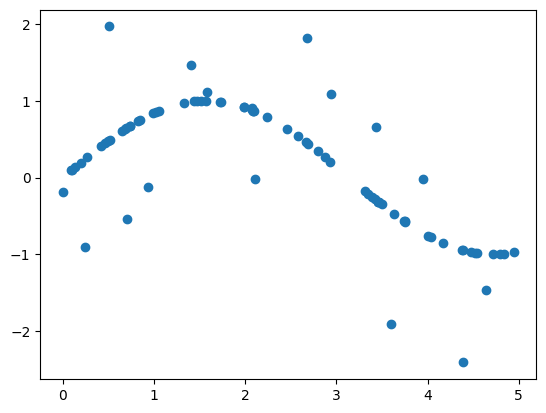

In [20]:
plt.scatter(x, y)

In [21]:
#Treinando os modelos
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=5)
reg_1.fit(x, y)
reg_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

[Text(0.4807692307692308, 0.9166666666666666, 'x[0] <= 3.446\nsquared_error = 0.703\nsamples = 80\nvalue = 0.145'),
 Text(0.23717948717948717, 0.75, 'x[0] <= 0.346\nsquared_error = 0.282\nsamples = 56\nvalue = 0.573'),
 Text(0.358974358974359, 0.8333333333333333, 'True  '),
 Text(0.10256410256410256, 0.5833333333333334, 'x[0] <= 0.223\nsquared_error = 0.141\nsamples = 7\nvalue = -0.045'),
 Text(0.05128205128205128, 0.4166666666666667, 'x[0] <= 0.046\nsquared_error = 0.018\nsamples = 5\nvalue = 0.066'),
 Text(0.02564102564102564, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -0.189'),
 Text(0.07692307692307693, 0.25, 'x[0] <= 0.166\nsquared_error = 0.002\nsamples = 4\nvalue = 0.13'),
 Text(0.05128205128205128, 0.08333333333333333, 'squared_error = 0.0\nsamples = 3\nvalue = 0.108'),
 Text(0.10256410256410256, 0.08333333333333333, 'squared_error = -0.0\nsamples = 1\nvalue = 0.194'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[0] <= 0.258\nsquared_error = 0.342\nsamples = 2\nvalue

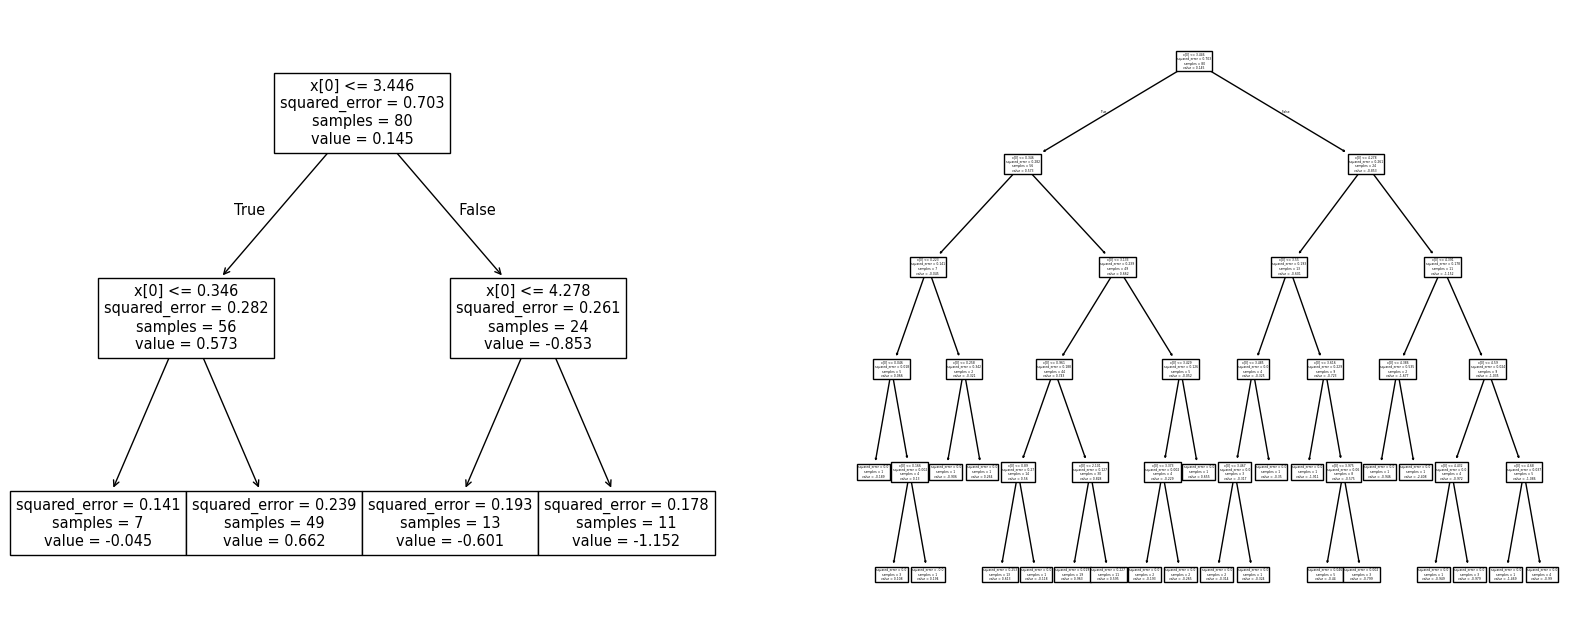

In [22]:
# Vizualisando as arvores
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
tree.plot_tree(reg_1, ax=ax[0])
tree.plot_tree(reg_2, ax=ax[1])

In [28]:
#Gerando dados de teste
x_test = np.arange(0, 5, 0.01)[:, np.newaxis]
y_1 = reg_1.predict(x_test)
y_2 = reg_2.predict(x_test)

Vamos detalhar o que está acontecendo nesta linha de código:

### 1. `np.arange(0, 5, 0.01)`

O método `np.arange` cria um array de números igualmente espaçados dentro de um intervalo definido. Aqui, os parâmetros são:

- `0`: Valor inicial (inclusive), ou seja, o array começa em 0.
- `5`: Valor final (exclusivo), ou seja, o array vai até, mas não inclui, 5.
- `0.01`: O espaçamento entre os valores consecutivos.

Isso significa que o código cria um array de números começando em 0, com incremento de 0,01, até 5 (mas sem incluir o 5). Portanto, o array resultante terá valores como:

\[ [0.00, 0.01, 0.02, \dots, 4.99] \]

Esse array terá **500 elementos** (pois \(5 / 0.01 = 500\)).

### 2. `[:, np.newaxis]`

O `np.newaxis` é usado para adicionar uma nova dimensão ao array. O operador `:` seleciona todos os elementos do array original, e `np.newaxis` insere uma nova dimensão, transformando o array unidimensional em uma **matriz coluna**.

- Sem `np.newaxis`, o array `x_test` teria a forma (500,), ou seja, seria unidimensional.
- Com `[:, np.newaxis]`, o array é transformado em uma matriz de forma **(500, 1)**, ou seja, 500 linhas e 1 coluna.

### Resumo:

- `np.arange(0, 5, 0.01)` cria um array com 500 valores igualmente espaçados entre 0 e 5 (excluindo o 5).
- `[:, np.newaxis]` transforma esse array em uma matriz coluna de forma (500, 1).

Então, o `x_test` será uma matriz coluna com 500 valores, variando de 0 até 4.99, e pode ser usada, por exemplo, para testar um modelo de regressão ou para gerar previsões contínuas ao longo desse intervalo.

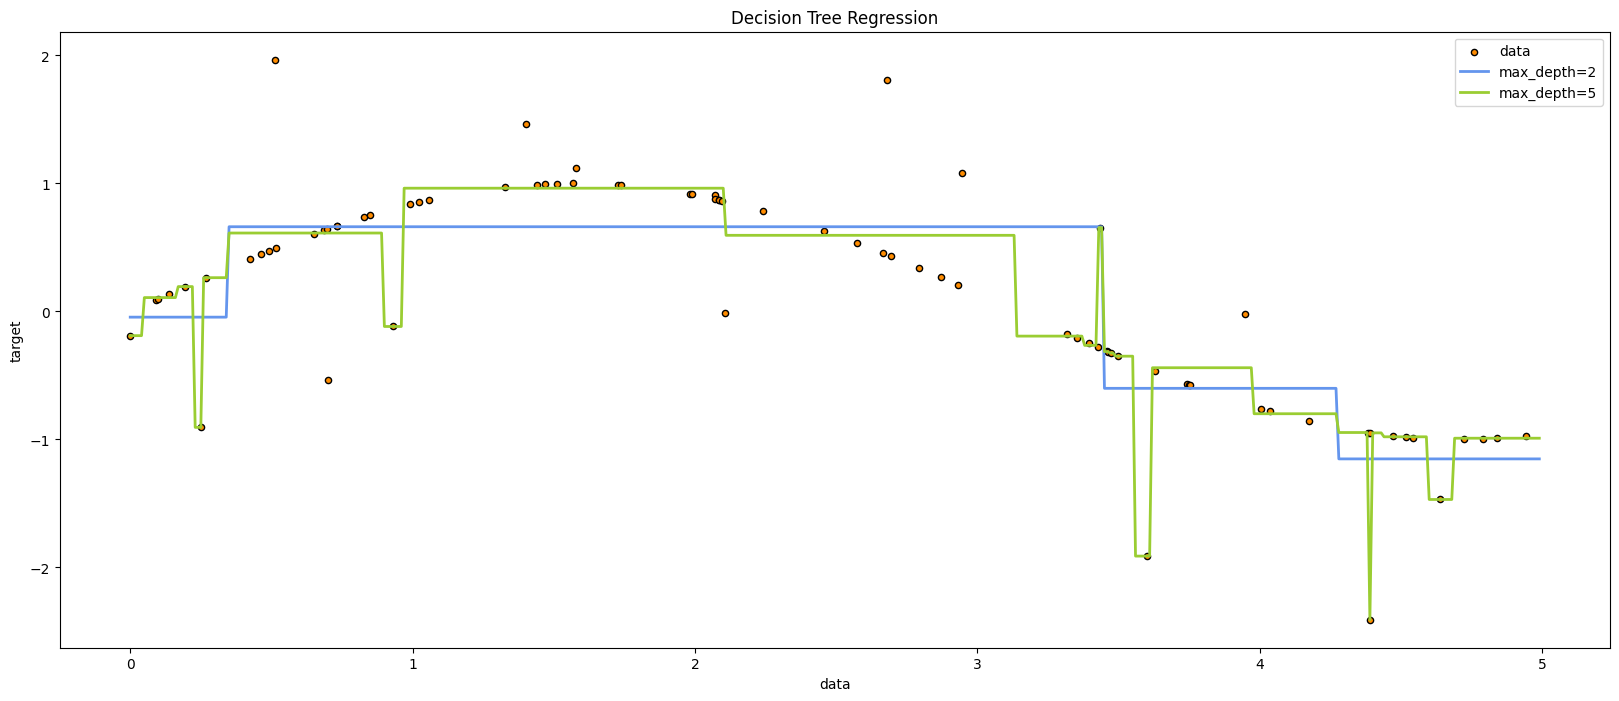

In [29]:
#Vizualisando os dados

plt.figure(figsize=(20, 8))
plt.scatter(x, y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(x_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(x_test, y_2, color='yellowgreen', label='max_depth=5', linewidth=2)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

## Função Custo para o modélo de Regressão de Arvore de Decisão

A função custo aqui tem mesma ideia da função custo mostrada anteriormente, porém ao invés do **Gini** nós usamos o **MSE**.
$$
J(k, t) = \frac{m_{in}}{M}MSE_{in} + \frac{m_{out}}{M}MSE_{out}
$$

Aqui o **MSE** é definido como :

$$ MSE_{node} = \sum (y_{node} - y^{(i)})^2 $$ 

para cada conjunto de pontos isolados pelo corte, onde :
- $y^{(i)}$ é cada valor $i$ isolado pelo corte,
- $y_{node}$ é o valor médio dos pontos $y^{(i)}$.

$$y_{node} = \frac{1}{m_{node}}\sum y^{(i)}$$ 

Onde $m_{node}$ é a soma total dos pontos $y^{(i)}$.

## Ensemble Learning

Essa técnica consiste em juntar vários modélos de **Machine Learning** em um único modelo afim de melhorar a performance geral.

In [11]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [31]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
breast_cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [12]:
#Pegando os dados das colunas 'mean area' e 'mean smoothness'.
x = breast_cancer.data[:, 3:5]

y = breast_cancer['target']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

tree_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
svm_clf = SVC()

voting_clf = VotingClassifier(
  estimators=[('tree', tree_clf), ('lr', lr_clf), ('svm', svm_clf)], voting='hard'
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()), ('svm', SVC())])

In [15]:
#Analisando  o desempenho dos modelos
from sklearn.metrics import accuracy_score

for clf in (tree_clf, lr_clf, svm_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8654970760233918
LogisticRegression 0.8771929824561403
SVC 0.8771929824561403
VotingClassifier 0.8830409356725146


## Random Forest (Floresta Aleatória)

### Bagging

Percebeu-se que é muito mais vatojoso treinar pequenos modelos com subconjuntos aleatórios tirados do conjunto total dos dados. Isso é o que chamamos de **Bagging**.  
Essa técnica é aplicada em conjunto com **Ensemble Learning** na **Random Forests**. Onde serão treinados pequenos modelos (arvores), cada um com um "pedaço" do cunjunto total dos dados selecionados aleatoriamente. 

In [16]:
x = breast_cancer.data
y = breast_cancer['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
from sklearn.ensemble import BaggingClassifier

#BaggingClassifier(modelo que sera usado, nº de estimadores desse modélo, qtd de dados para cada estimador, permite que um mesmo valor seja passado para mais de um estimador porém combinado com outros parâmetros)
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)

#Criando uma super arvore para comparar com o nossa Random Forest que foi feita usando Bagging e Ensemble.
tree_clf = DecisionTreeClassifier(max_depth=40)

bag_clf.fit(x_train, y_train)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [18]:
for clf in (tree_clf, bag_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.9590643274853801
BaggingClassifier 0.9766081871345029


No próprio _sklearn_ já tem o **Random Forest** implementado sem as técnicas mostradas anteriormente. Vamos usá-la abaixo.

In [19]:
from sklearn.ensemble import RandomForestClassifier

rnf_clf = RandomForestClassifier()

rnf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rnf_clf.predict(x_test)
accuracy_score(y_test, y_pred )

0.9824561403508771

## Feature Importance

Essa técnica nos ajuda a entender o impacto de cada feature na decisão do modélo.

In [21]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

In [25]:
rnd_clf.feature_importances_

array([0.05206688, 0.01018357, 0.04950638, 0.05660894, 0.00477766,
       0.01098391, 0.05398109, 0.10839549, 0.00251222, 0.00464085,
       0.01766108, 0.00508602, 0.01492606, 0.03429858, 0.00350213,
       0.00365078, 0.00386049, 0.00417996, 0.00347775, 0.00290266,
       0.12796615, 0.01082147, 0.12923931, 0.10910665, 0.0086148 ,
       0.01482034, 0.03294187, 0.10348834, 0.01065535, 0.00514323])

In [22]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<Axes: >

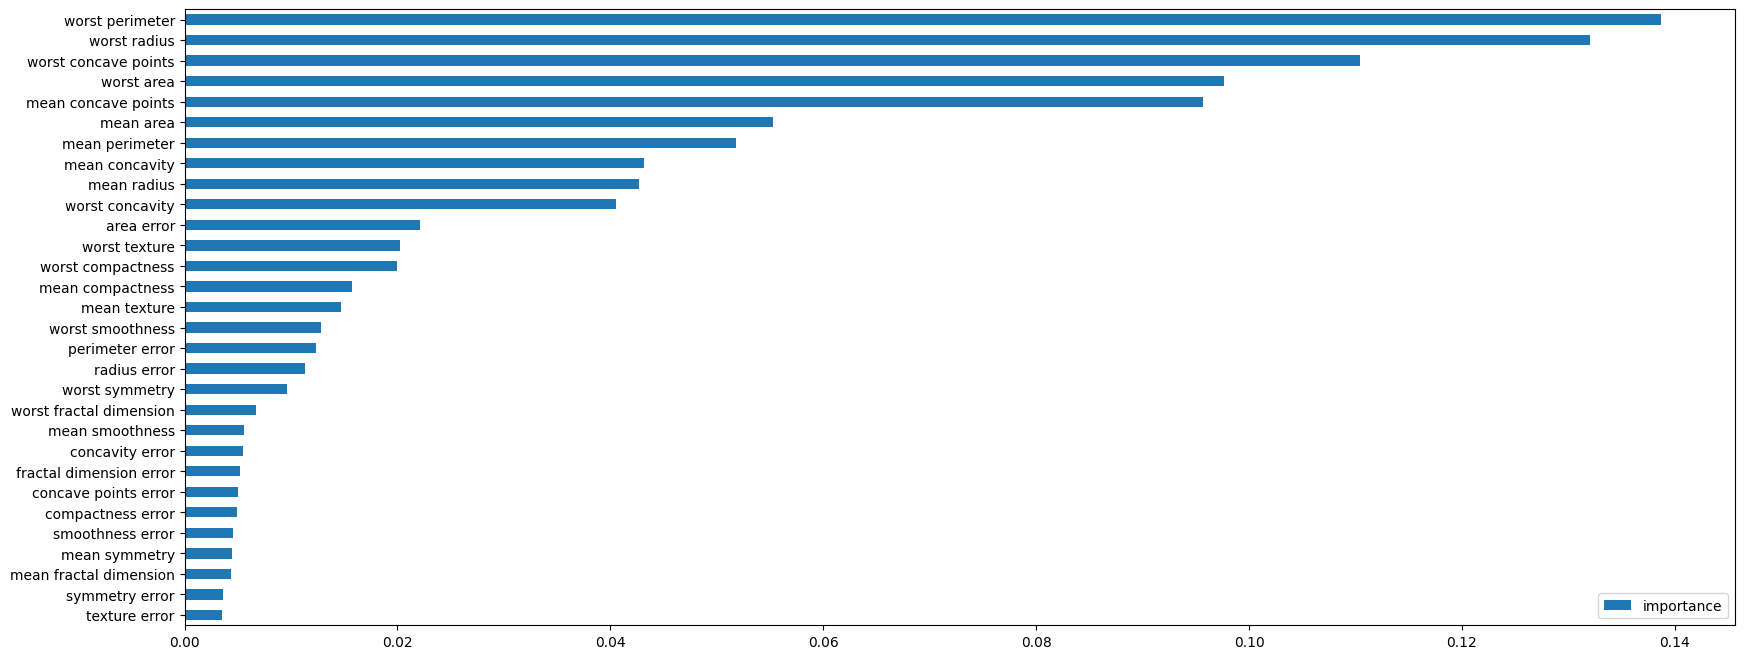

In [23]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_, index=breast_cancer['feature_names'], columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind='barh', ax=ax)

O gráfico da uma ideia (algo bem simplista) de quais features teve mais impacto na decisão do nosso modélo. Para uma análise mais profunda, requer um estudo mais abrangente.